Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.
Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 


Data Set Description

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   


The data set includes:

This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Malignant train.csv')
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
df1 = pd.read_csv('Malignant test.csv')
df1

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [4]:
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [5]:
df1.isnull().sum()

id              0
comment_text    0
dtype: int64

In [6]:
df.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [7]:
df1.dtypes

id              object
comment_text    object
dtype: object

# Encoding of Dataframe

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df
    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,72698,0,0,0,0,0,0
1,1,68359,0,0,0,0,0,0
2,2,79594,0,0,0,0,0,0
3,4,35519,0,0,0,0,0,0
4,5,146426,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,159505,44289,0,0,0,0,0,0
159567,159510,145720,0,0,0,0,0,0
159568,159524,122203,0,0,0,0,0,0
159569,159535,60037,0,0,0,0,0,0


In [9]:
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i]=le.fit_transform(df1[i].values.reshape(-1,1))
df1

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,id,comment_text
0,0,139489
1,1,82945
2,2,15380
3,3,71743
4,4,116535
...,...,...
153159,153159,51845
153160,153160,93347
153161,153161,13499
153162,153162,8042


In [10]:
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [11]:
df1.isnull().sum()

id              0
comment_text    0
dtype: int64

# Data Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df.dtypes

id                  int64
comment_text        int64
malignant           int64
highly_malignant    int64
rude                int64
threat              int64
abuse               int64
loathe              int64
dtype: object

In [14]:
df1.dtypes

id              int64
comment_text    int64
dtype: object

<AxesSubplot:xlabel='id', ylabel='Count'>

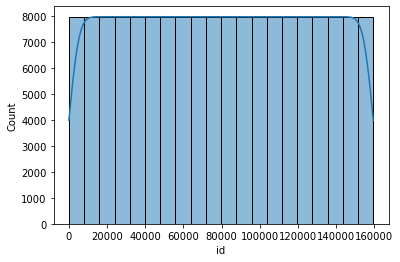

In [15]:
sns.histplot(x='id',bins=20,data=df,kde=True)

<AxesSubplot:xlabel='id', ylabel='Count'>

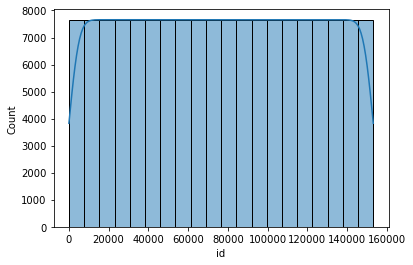

In [16]:
sns.histplot(x='id',data=df1,bins=20,kde=True)

<AxesSubplot:xlabel='comment_text', ylabel='Count'>

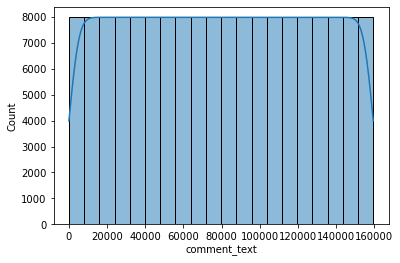

In [17]:
sns.histplot(x='comment_text',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='comment_text', ylabel='Count'>

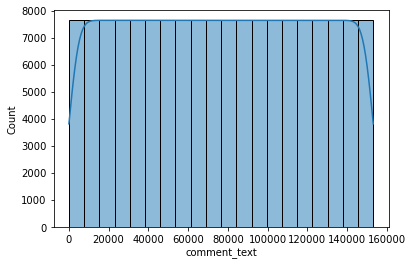

In [18]:
sns.histplot(x='comment_text',data=df1,bins=20,kde=True)

0    144277
1     15294
Name: malignant, dtype: int64


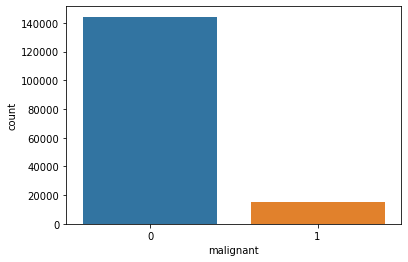

In [19]:
sns.countplot(x='malignant',data=df)
print(df['malignant'].value_counts())

0    157976
1      1595
Name: highly_malignant, dtype: int64


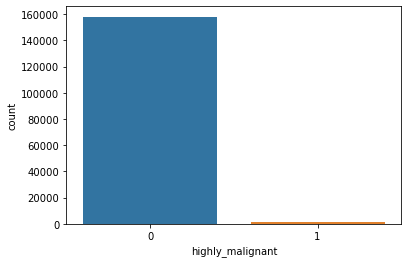

In [20]:
sns.countplot(x='highly_malignant',data=df)
print(df['highly_malignant'].value_counts())

0    151122
1      8449
Name: rude, dtype: int64


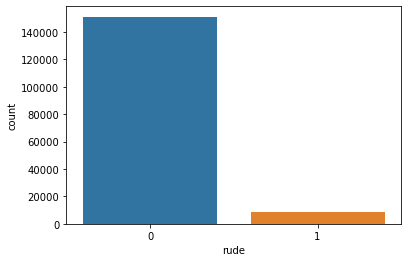

In [21]:
sns.countplot(x='rude',data=df)
print(df['rude'].value_counts())

0    159093
1       478
Name: threat, dtype: int64


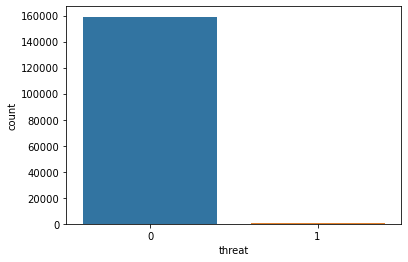

In [22]:
sns.countplot(x='threat',data=df)
print(df['threat'].value_counts())

0    151694
1      7877
Name: abuse, dtype: int64


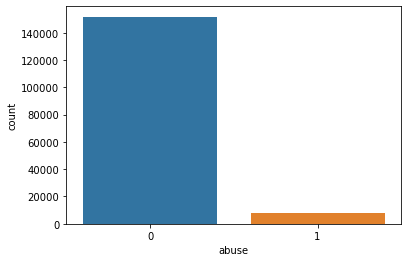

In [23]:
sns.countplot(x='abuse',data=df)
print(df['abuse'].value_counts())

0    158166
1      1405
Name: loathe, dtype: int64


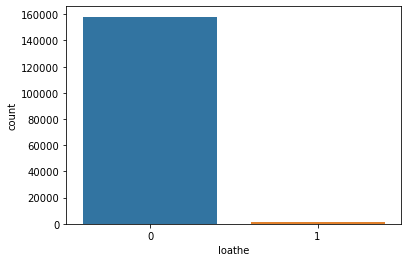

In [24]:
sns.countplot(x='loathe',data=df)
print(df['loathe'].value_counts())

# Describing Datasets

In [25]:
df.describe()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.00000,159571.00000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,79785.00000,79785.00000,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,46064.32424,46064.32424,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39892.50000,39892.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,79785.00000,79785.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,119677.50000,119677.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,159570.00000,159570.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

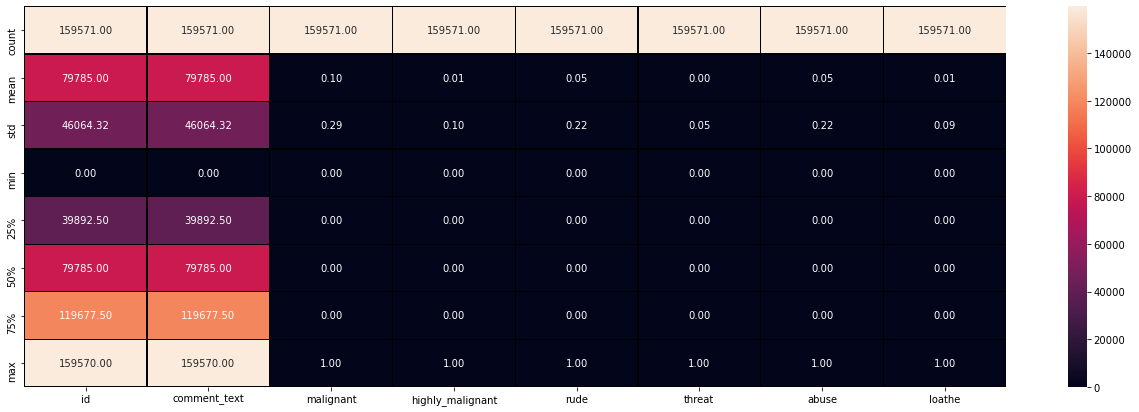

In [26]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.2,linecolor='black',fmt='0.2f')

In [27]:
df.corr()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
id,1.000000,0.002812,-0.003263,-0.001403,-0.002188,-0.001165,-0.002086,-0.000844
comment_text,0.002812,1.000000,0.132016,0.057627,0.104020,0.026093,0.111724,0.046234
malignant,-0.003263,0.132016,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,-0.001403,0.057627,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,-0.002188,0.104020,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,-0.001165,0.026093,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,-0.002086,0.111724,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,-0.000844,0.046234,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


<AxesSubplot:>

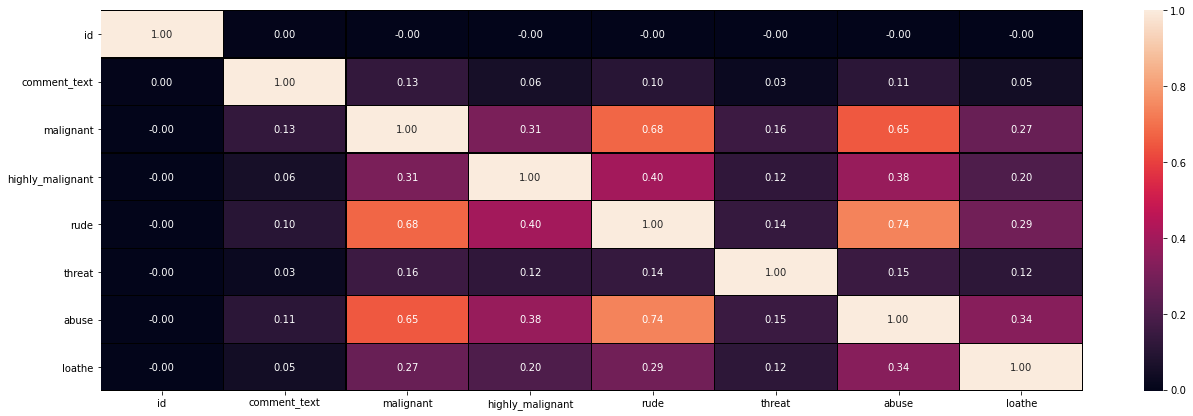

In [28]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.2,linecolor='black',fmt='0.2f')

In [29]:
df1.describe()

,id,comment_text
count,153164.000000,153164.000000
mean,76581.500000,76581.500000
std,44214.782652,44214.782652
min,0.000000,0.000000
25%,38290.750000,38290.750000
50%,76581.500000,76581.500000
75%,114872.250000,114872.250000
max,153163.000000,153163.000000


<AxesSubplot:>

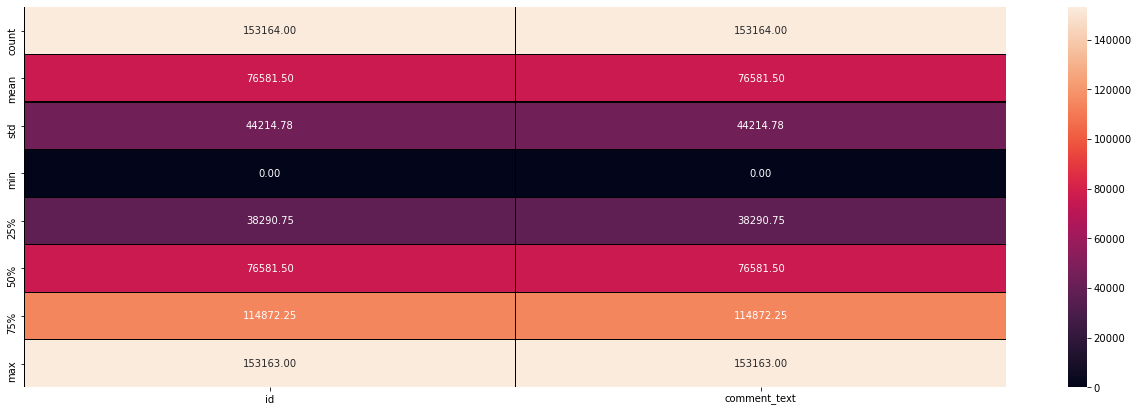

In [30]:
plt.figure(figsize=(22,7))
sns.heatmap(df1.describe(),annot=True,linewidth=0.2,linecolor='black',fmt='0.2f')

In [31]:
df1.corr()

,id,comment_text
id,1.00000,-0.00202
comment_text,-0.00202,1.00000


<AxesSubplot:>

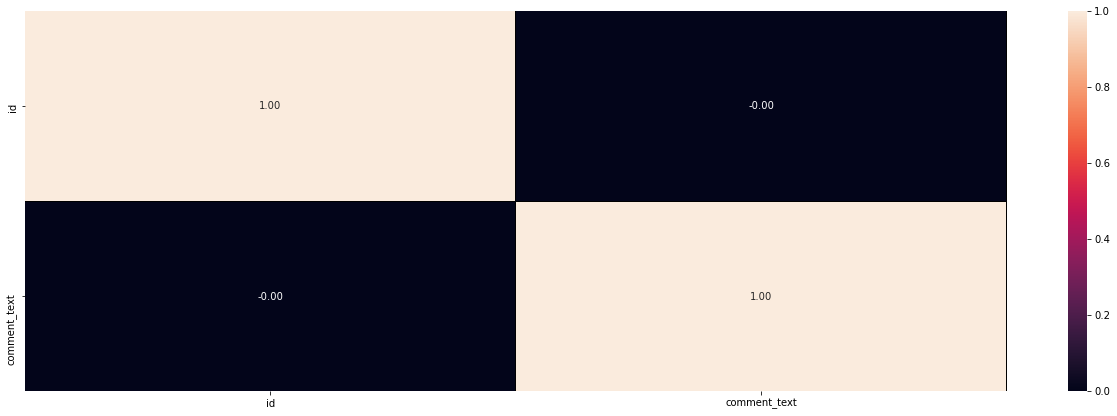

In [32]:
plt.figure(figsize=(22,7))
sns.heatmap(df1.corr(),annot=True,linewidth=0.2,linecolor='black',fmt='0.2f')

# Outliers Checking

In [33]:
df.skew()

id                  7.386055e-17
comment_text        1.282301e-19
malignant           2.745854e+00
highly_malignant    9.851722e+00
rude                3.992817e+00
threat              1.818900e+01
abuse               4.160540e+00
loathe              1.051592e+01
dtype: float64

In [34]:
df1.skew()

id              0.000000e+00
comment_text    1.510704e-18
dtype: float64

In [35]:
df1=df1.drop('id',axis=1)

In [36]:
df1.skew()

comment_text    1.510704e-18
dtype: float64

<AxesSubplot:>

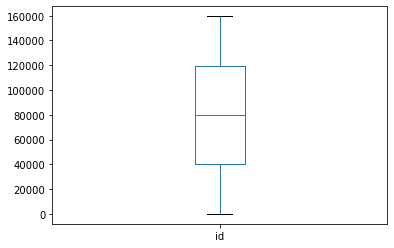

In [37]:
df['id'].plot.box()

<AxesSubplot:>

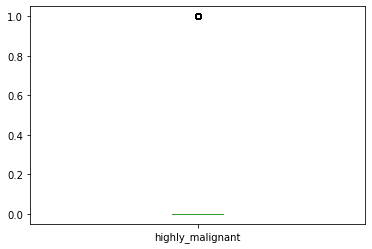

In [38]:
df['highly_malignant'].plot.box()

<AxesSubplot:>

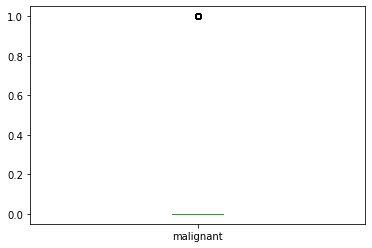

In [39]:
df['malignant'].plot.box()

<AxesSubplot:>

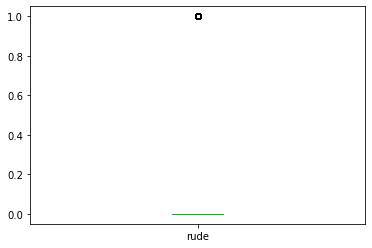

In [40]:
df['rude'].plot.box()

<AxesSubplot:>

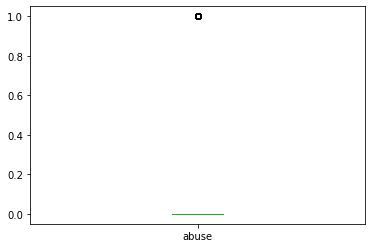

In [41]:
df['abuse'].plot.box()

<AxesSubplot:>

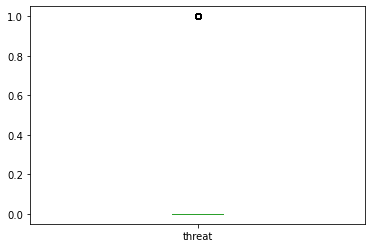

In [42]:
df['threat'].plot.box()

<AxesSubplot:>

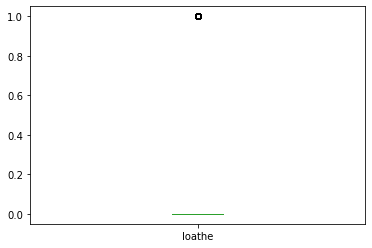

In [43]:
df['loathe'].plot.box()

<AxesSubplot:>

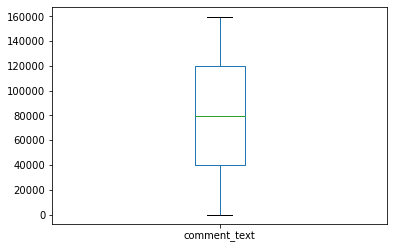

In [44]:
df['comment_text'].plot.box()

<AxesSubplot:>

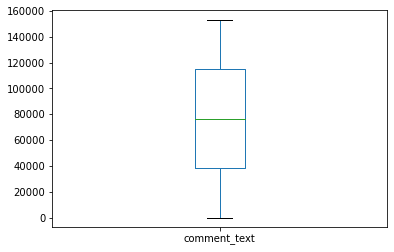

In [45]:
df1['comment_text'].plot.box()

In [46]:
df.shape

(159571, 8)

In [47]:
df1.shape

(153164, 1)

# Separating x and y

In [48]:
x=df.drop('malignant',axis=1)
y=df['malignant']

In [49]:
from sklearn.preprocessing import power_transform

In [50]:
x=power_transform(x,method='yeo-johnson')
x

array([[-2.1965229 , -0.04590477, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005],
       [-2.19602627, -0.13752042, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005],
       [-2.19560067,  0.09647909, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005],
       ...,
       [ 1.55302692,  0.90884561, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005],
       [ 1.55320978, -0.31817882, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005],
       [ 1.55330953, -1.01693553, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005]])

# Scaling Dataset

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.1965229 , -0.04590477, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005],
       [-2.19602627, -0.13752042, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005],
       [-2.19560067,  0.09647909, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005],
       ...,
       [ 1.55302692,  0.90884561, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005],
       [ 1.55320978, -0.31817882, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005],
       [ 1.55330953, -1.01693553, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005]])

In [53]:
train=df
test=df1

# Model building

In [54]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [55]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i,"The Model perform very well")
        print("At random state :-",i)
        print("Training r2_score is :-",accuracy_score(y_train,pred_train)*100)
        print("Testing r2_score is :-",accuracy_score(y_test,pred_test)*100)
    

At random state  4 The Model perform very well
At random state :- 4
Training r2_score is :- 95.83966978057788
Testing r2_score is :- 95.79374827664002
At random state  5 The Model perform very well
At random state :- 5
Training r2_score is :- 95.82295827136149
Testing r2_score is :- 95.83134885819568
At random state  11 The Model perform very well
At random state :- 11
Training r2_score is :- 95.82713614866559
Testing r2_score is :- 95.8438823853809
At random state  12 The Model perform very well
At random state :- 12
Training r2_score is :- 95.84969668610772
Testing r2_score is :- 95.75113428421027
At random state  17 The Model perform very well
At random state :- 17
Training r2_score is :- 95.81961596951821
Testing r2_score is :- 95.84638909081794
At random state  20 The Model perform very well
At random state :- 20
Training r2_score is :- 95.83382075235215
Testing r2_score is :- 95.80126839295114
At random state  22 The Model perform very well
At random state :- 22
Training r2_score

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     36007
           1       0.92      0.62      0.74      3886

    accuracy                           0.96     39893
   macro avg       0.94      0.81      0.86     39893
weighted avg       0.96      0.96      0.95     39893



# Cross Validation of Dataset

In [57]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv :- ",j)
    print("Cross validation score is :-",lsc*100)
    print("accuracy_score is :-",lss*100)
    print("\n")

At cv :-  2
Cross validation score is :- 95.82568263097457
accuracy_score is :- 95.73108064071391


At cv :-  3
Cross validation score is :- 95.8269366825809
accuracy_score is :- 95.73108064071391


At cv :-  4
Cross validation score is :- 95.8288157296754
accuracy_score is :- 95.73108064071391


At cv :-  5
Cross validation score is :- 95.82944332091934
accuracy_score is :- 95.73108064071391


At cv :-  6
Cross validation score is :- 95.82881619276607
accuracy_score is :- 95.73108064071391


At cv :-  7
Cross validation score is :- 95.8288162829427
accuracy_score is :- 95.73108064071391


At cv :-  8
Cross validation score is :- 95.82819076363052
accuracy_score is :- 95.73108064071391


At cv :-  9
Cross validation score is :- 95.82881539114092
accuracy_score is :- 95.73108064071391




In [58]:
lsscore_selected=cross_val_score(lr,x,y,cv=2).mean()
print("The cv score is: ",lsscore_selected,"\n The accuracy_score is: ",lss)

The cv score is:  0.9582568263097456 
 The accuracy_score is:  0.9573108064071391


# AUC ROC curve

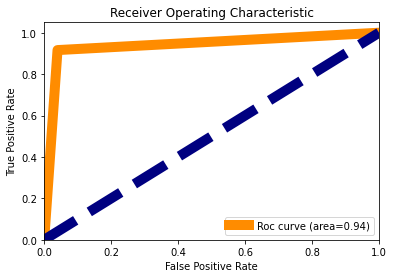

In [59]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# Model Saving

In [60]:
import pickle
filename='Malignant.dt'
pickle.dump(lr,open(filename,'wb'))

# Conclusion

In [61]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
df_com

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
39888,1,0
39889,0,0
39890,0,0
39891,0,0
